<a href="https://colab.research.google.com/github/onshmidi21/ia/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### apprentissage supervisé


In [ ]:
print("test")

test


In [ ]:
!pip install pandas


In [ ]:
import platform

In [ ]:
platform.python_version()

'3.11.13'

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("prix_maisons.csv")

In [ ]:
df


,area,price
0,100,1218000
1,120,1440000
2,150,1800000
3,260,2860000
4,320,2880000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,5.0,190.0,95.393920,100.0,120.0,150.0,260.0,320.0
price,5.0,2039600.0,786015.775923,1218000.0,1440000.0,1800000.0,2860000.0,2880000.0


In [ ]:
import matplotlib.pyplot as plt

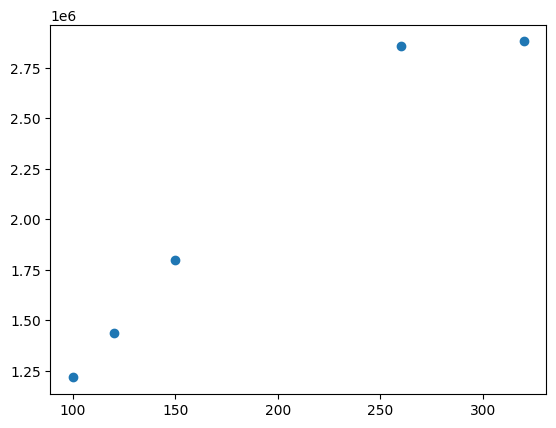

In [ ]:
plt.scatter(df["area"], df["price"])


In [ ]:
! pip install scikit-learn


In [ ]:
from sklearn import linear_model

In [ ]:
model=linear_model.LinearRegression()

In [ ]:
y=df["price"]
x=df.drop(columns="price")

In [ ]:
y

,price
0,1218000
1,1440000
2,1800000
3,2860000
4,2880000


In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
price=model.predict([[120]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(price)

[1477715.38461538]


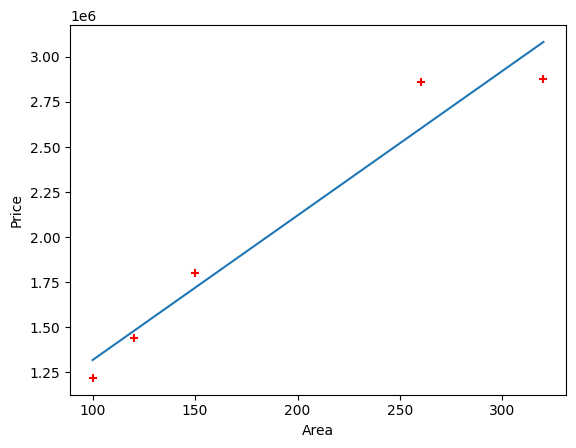

In [ ]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df['area'], df['price'], color='red', marker="+")
plt.plot(df['area'], model.predict(df[['area']]))

In [ ]:
predicted=model.predict(x)

In [ ]:
from sklearn import metrics


In [ ]:
metrics.r2_score(y,predicted)

0.9490237236328821

In [ ]:
df2=pd.read_csv("prix_maisons2.csv")

In [ ]:
df2

,area,rooms,age,city,price
0,100,3.0,4,Casablanca,1500000
1,120,4.0,10,Casablanca,1680000
2,260,NaN,20,Casablanca,3380000
3,190,5.0,1,Casablanca,3040000
4,260,5.0,4,Casablanca,3900000
5,60,2.0,3,Casablanca,1080000
6,100,3.0,4,Marrakech,1400000
7,120,4.0,10,Marrakech,1580000
8,260,5.0,20,Marrakech,3280000
9,190,5.0,1,Marrakech,2900000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    18 non-null     int64  
 1   rooms   15 non-null     float64
 2   age     18 non-null     int64  
 3   city    18 non-null     object 
 4   price   18 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 852.0+ bytes


In [ ]:
df2.isna(
).sum()

,0
area,0
rooms,3
age,0
city,0
price,0


In [ ]:
median = df2['rooms'].median()


In [ ]:
print(median)

4.0


In [ ]:
df2['rooms']=df2['rooms'].fillna(median)


In [ ]:
df2['city'].value_counts()

,count
city,
Casablanca,6
Marrakech,6
Tanger,6


In [ ]:
from sklearn import preprocessing

In [ ]:
encoder=preprocessing.LabelEncoder();

In [ ]:
df2['city_label'] =encoder.fit_transform(df2['city'])


In [ ]:
df2

,area,rooms,age,city,price,city_label
0,100,3.0,4,Casablanca,1500000,0
1,120,4.0,10,Casablanca,1680000,0
2,260,4.0,20,Casablanca,3380000,0
3,190,5.0,1,Casablanca,3040000,0
4,260,5.0,4,Casablanca,3900000,0
5,60,2.0,3,Casablanca,1080000,0
6,100,3.0,4,Marrakech,1400000,1
7,120,4.0,10,Marrakech,1580000,1
8,260,5.0,20,Marrakech,3280000,1
9,190,5.0,1,Marrakech,2900000,1
